<a href="https://colab.research.google.com/github/lalitha-sahitya/simple-linear-regression/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading Data

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd
od.download('https://www.kaggle.com/datasets/andonians/random-linear-regression')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 10.3MB/s]

In [4]:
os.listdir('random-linear-regression')

['test.csv', 'train.csv']

In [5]:
df=pd.read_csv('/content/random-linear-regression/train.csv')
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [6]:
test_df=pd.read_csv('/content/random-linear-regression/test.csv')
test_df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [8]:
df=df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


Visualization

<Axes: xlabel='x', ylabel='y'>

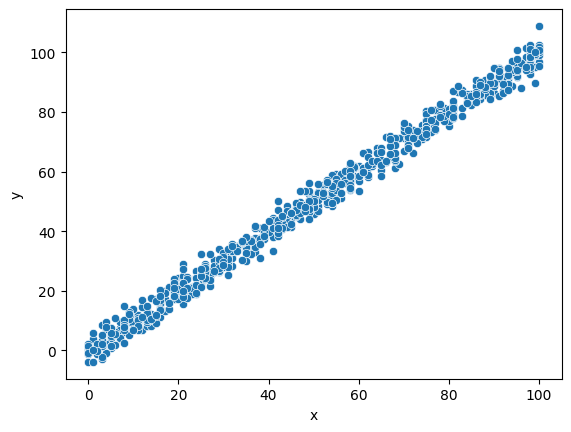

In [9]:
import seaborn as sns
sns.scatterplot(x='x',y='y',data=df)

Train-Validation split

In [10]:
x=df['x']
y=df['y']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)

In [12]:
x_train

,x
424,26.0
144,8.0
29,48.0
563,67.0
662,35.0
...,...
418,78.0
176,2.0
451,68.0
230,89.0


Data preprocessing

In [13]:
x_train=x_train.values.reshape(-1,1)
x_val=x_val.values.reshape(-1,1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)

Model and Evaluation

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error
train_preds=model.predict(x_train)
val_preds=model.predict(x_val)
train_mse=mean_squared_error(y_train,train_preds)
val_mse=mean_squared_error(y_val,val_preds)
print('training error:' ,train_mse)
print('validation error:' ,val_mse)

training error: 7.554079801059852
validation error: 9.12214608536838


In [17]:
x_test=test_df['x']
x_test=x_test.values.reshape(-1,1)
x_test=scaler.transform(x_test)

In [18]:
test_preds=model.predict(x_test)

In [19]:
test_mse=mean_squared_error(test_df['y'],test_preds)
print('test error:' ,test_mse)

test error: 9.42040231527418


In [20]:
import pickle
with open('model.pkl','wb') as f:
  pickle.dump(model,f)